<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="images/Ray-pink-Property-Case-Banner.jpg"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [66]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

# Preprocessing

In [67]:
dfD.drop(dfD.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfJ.drop(dfJ.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfB.drop(dfB.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfT.drop(dfT.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)
dfX.drop(dfX.columns[[14,15,16,17,18,19,20,21,22,23,24,25]],axis = 1,inplace=True)

In [68]:
dfD.drop_duplicates(inplace=True)
dfJ.drop_duplicates(inplace=True)
dfB.drop_duplicates(inplace=True)
dfT.drop_duplicates(inplace=True)
dfX.drop_duplicates(inplace=True)

In [69]:
dfD.drop([118,120,121],inplace=True)
dfJ.drop([121],inplace=True)
dfB.drop([193],inplace=True)
dfX.drop([107],inplace=True)
dfT.drop([124],inplace=True)

In [70]:
def fillnull(df):	
    df["LT"].fillna(0,inplace=True)
    df["LB"].fillna(0,inplace=True)
    df["KT"].fillna(0,inplace=True)
    df["KM"].fillna(0,inplace=True)
    df["garasi"].fillna(0,inplace=True)
    df["carport"].fillna(0,inplace=True)
    df["lokasi"].fillna('Not Given',inplace=True)
    df["sertifikat"].fillna('Not Given',inplace=True)
    df["listrik"].fillna(0,inplace=True)
    df["hadap"].fillna('Not Given',inplace=True)
    df["harga"].fillna(0,inplace=True)
    df["URL"].fillna('Not Given',inplace=True)
    df["deskripsi"].fillna('Not Given',inplace=True)
    df["LT"] = df["LT"].astype('float')
    df["lokasi"] = df["lokasi"].astype('category')
    df["sertifikat"] = df["sertifikat"].astype('category')
    df["hadap"] = df["hadap"].astype('category')


In [71]:
fillnull(dfD)
fillnull(dfJ)
fillnull(dfB)
fillnull(dfX)
fillnull(dfT)

In [72]:
dfD['wilayah']='Depok'

In [73]:
dfD['wilayah']='Depok'
dfX['wilayah']='Bekasi'
dfT['wilayah']='Tangerang'
dfB['wilayah']='Bogor'
dfJ['wilayah']='Jakarta'

In [74]:
df = pd.concat([dfD,dfB,dfJ,dfT,dfX],ignore_index=True)


In [75]:
df["LT"] = df["LT"].astype('float')
df["lokasi"] = df["lokasi"].astype('category')
df["sertifikat"] = df["sertifikat"].astype('category')
df["hadap"] = df["hadap"].astype('category')
df["wilayah"] = df["wilayah"].astype('category')

In [76]:
df.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
URL             object
deskripsi       object
wilayah       category
dtype: object

# EDA

1. Data yang dimiliki perusahaan sudah cukup baik, namun untuk data jenis sertifikat properti yang ditawarkan masih terbilang tidak lengkap terlihat dari banyaknya null pada data. Selain itu, data lokasi rumah juga kurang spesifik karena hanya menjelaskan letak kelurahannya saja tanpa memberikan detail alamat rumah.

2. DE/DBA perusahaan sebaiknya melengkapi data jenis sertifikat dari properti yang ditawarkan agar kualitas data menjadi lebih baik dan tidak menutup kemungkinan akan ditemukan insight baru yang dapat menguntungkan pihak RPPI. DE/DBA perusahaan juga disarankan untuk lebih memperjelas data lokasi properti yang ditawarkan agar tidak terbatas pada lingkup kelurahan saja

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3

c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: Us

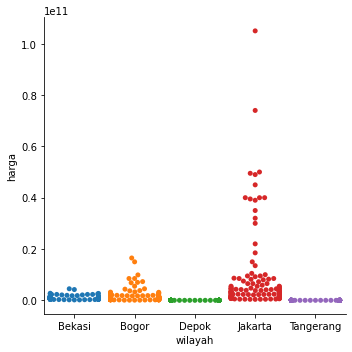

In [78]:
p = sns.catplot(x='wilayah',y='harga',kind='swarm',data=df)

Terlihat terdapat kecenderungan harga property yang lebih tinggi di wilayah Jakarta dibandingkan wilayah lain, diikuti Bogor, Bekasi, kemudian Depok dan Tangerang. Harga property di Jakarta lebih mahal karena Jakarta merupakan pusat lokasi bisnis di Indonesia. Menurut Executive Director Jakarta Property Institute Wendy Haryanto, mengatakan bahwa salah satu faktor harga rumah di Jakarta mahal dipengaruhi zin Mendirikan Bangunan (IMB) dan sulitnya akses terkait kemudahan berbisnis (ease of doing business).
sumber: https://www.idxchannel.com/economics/harga-rumah-di-jakarta-ternyata-lebih-mahal-dari-new-york-dan-london-kenapa-ya

## 4. 
Dilihat dari plot kota dengan properti dijual terbanyak, RPPI disarankan untuk membuat kantor cabang di kota dengan jumlah properti dijual terbanyak, yakni kota Jakarta. Dengan membuat kantor cabang di Jakarta, maka akan mempermudah RPPI dalam mengawasi dan mengontrol properti" miliknya.

## 5

In [80]:
df.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,6.630000e+02
mean,163.779789,151.380090,3.155354,2.300151,0.416290,1.239819,2896.530920,2.188769e+09
std,242.135058,199.432867,1.387797,1.375920,1.003848,1.133711,4693.275066,7.596722e+09
min,16.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.100000e+01
25%,68.000000,50.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,1.950000e+03
50%,94.000000,83.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,4.560000e+08
75%,160.000000,180.000000,4.000000,3.000000,0.000000,2.000000,2200.000000,1.350000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11


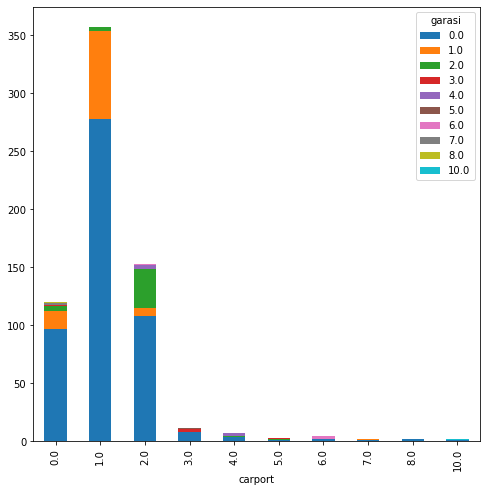

In [81]:
CT = pd.crosstab(index=df["carport"], columns=df["garasi"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

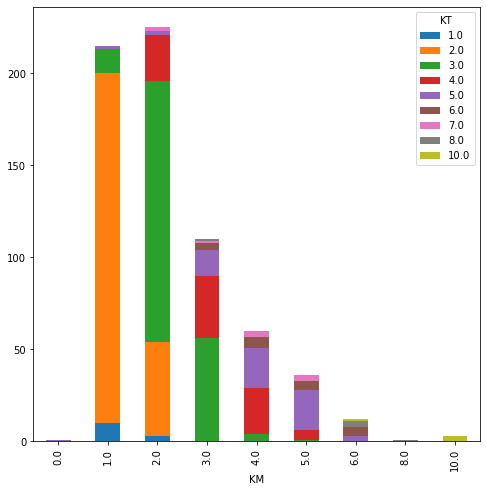

In [82]:
CT = pd.crosstab(index=df["KM"], columns=df["KT"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Rumah dengan karakteristik yang paling banyak dijual oleh RPPI adalah rumah dengan 160 LT, 150 LB, 2 Kamar Mandi, 2 Kamar Tidur, tidak ada garasi, dan 1 carport.

## 5

In [83]:
df.sort_values(['LB','LT','harga'], ascending=[False,False, True]).where(df["sertifikat"]!="Not Given")


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,wilayah
532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,07-12-2021,700.0,2000.0,10.0,10.0,0.0,10.0,Jakarta Pusat,SHM,66000.0,Utara,1.050000e+11,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...,Jakarta
353,05-12-2021,950.0,1400.0,6.0,4.0,7.0,0.0,Jakarta Selatan,SHM,23000.0,Not Given,4.900000e+10,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn...",Jakarta
144,06-12-2021,1500.0,1200.0,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.0,Not Given,9.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",Bogor
406,07-12-2021,640.0,1200.0,6.0,5.0,0.0,2.0,Jakarta Utara,SHM,9500.0,Not Given,3.900000e+10,https://www.rumah123.com/properti/jakarta-utar...,Rumah Mewah Rapi dan Luas dengan lebar 16x40=6...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,07-12-2021,30.0,25.0,1.0,1.0,0.0,1.0,Cibinong,SHM,1300.0,Not Given,1.300000e+08,https://www.rumah.com/listing-properti/dijual-...,"Lokasi strategis, keamanan 24 jam, arena berma...",Bogor
241,01-12-2021,66.0,24.0,1.0,1.0,0.0,1.0,Tenjo,SHM,1300.0,Not Given,1.680000e+08,https://www.rumah.com/listing-properti/dijual-...,Paling dekat ke stasiun dari pada perumahan-pe...,Bogor
244,01-12-2021,38.0,21.0,1.0,1.0,0.0,1.0,Bogor Barat,SHM,1300.0,Not Given,2.000000e+08,https://www.rumah.com/listing-properti/dijual-...,- Dekat RS. Medika\n- Dekat RS. Karya Bhakti P...,Bogor
394,06-11-2021,36.0,21.0,1.0,1.0,0.0,1.0,Jakarta Utara,SHM,1300.0,Not Given,4.400000e+08,https://www.rumah.com/listing-properti/dijual-...,"Rumah Murah Minimalis Jakarta Utara, Miniclust...",Jakarta


Rumah yang berada di wilayah Cileungsi dengan sertifikat SHM, luas tanah 1500 meter, luas bangunan 1200 meter, dengan 8 kamar tidur dan 6 kamar mandi, tidak terdapat garansi, dan carport sejumlah 8 buah  dengan harga 9,9 milliar menjadi rekomendasi yang pertama.

atau Rumah yang berada di wilayah Jakarta Utara dengan sertifikat SHM, luas tanah 640 meter, luas bangunan 1200 meter, dengan 6 kamar tidur dan 5 kamar mandi, tidak terdapat garansi, dan carport sejumlah 2 buah  dengan harga 3,9 miliar menjadi rekomendasi yang kedua.

## 7

<AxesSubplot:xlabel='listrik', ylabel='harga'>

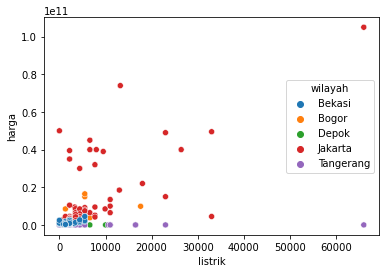

In [87]:
sns.scatterplot(x="listrik",y="harga",hue="wilayah",data=df)

Harga bangunan meningkat seiring dengan harga bangunan, dengan kota jakarta merupakan daerah dengan kualitas tertinggi untuk biaya dan listrik

c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BN001719195\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


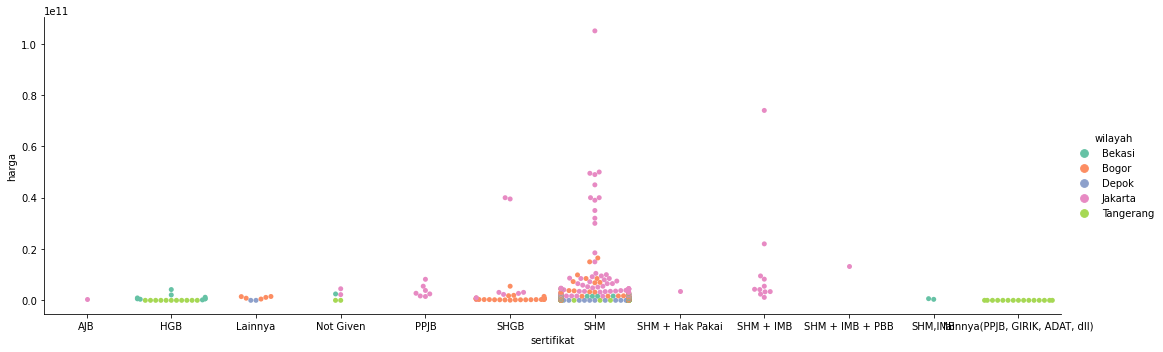

In [85]:
sns.catplot(x="sertifikat",y="harga",kind="swarm",data=df,aspect=3,hue="wilayah",palette="Set2")

Terlihat bahwa paling banyak orang menjual rumah dengan sertifikat SHM, dengan harga paling tinggi pada sertifikat SHM

Secara Umum, kami paling menyarankan RPPI melakukan pembelian pada rumah dengan sertifikat SHM. Perlu dipastikan bahwa sertifikat dari penjual sudah valid dan bisa digunakan, dan dengan daerah wilayah Jakarta menjadi wilayah terbaik untuk melakukan pembelian bangunan untuk kemudian dijual.